In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [27]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [28]:
tX

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [29]:
tX.shape

(250000, 30)

In [30]:
print([tX[:, col].dtype for col in range(30)])

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [31]:
np.count_nonzero(tX == -999, axis=0)

array([ 38114,      0,      0,      0, 177457, 177457, 177457,      0,
            0,      0,      0,      0, 177457,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,  99913,
        99913,  99913, 177457, 177457, 177457,      0])

In [32]:
row_nan_pct = np.count_nonzero(tX == -999, axis=0) / len(tX)

In [33]:
row_nan_pct 

array([0.152456, 0.      , 0.      , 0.      , 0.709828, 0.709828,
       0.709828, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.709828, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.399652,
       0.399652, 0.399652, 0.709828, 0.709828, 0.709828, 0.      ])

In [34]:
np.count_nonzero(row_nan_pct == 0)

19

In [35]:
non_nan_cols = (row_nan_pct == 0)

In [36]:
non_nan_cols

array([False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True])

In [43]:
tX_new = tX[:, non_nan_cols]

In [44]:
tX_new.shape

(250000, 19)

In [45]:
from implementations import standardize_data, add_bias, encode_binary
tX_new = standardize_data(tX_new)
tX_new = add_bias(tX_new)
y_new = encode_binary(y)

In [46]:
y_new

array([1., 0., 0., ..., 1., 0., 0.])

In [47]:
tX_new

array([[ 1.        ,  0.06833197,  0.40768027, ...,  0.38684673,
         1.04440205,  0.4125105 ],
       [ 1.        ,  0.55250482,  0.54013641, ..., -0.35771893,
         0.02130497, -0.27381996],
       [ 1.        ,  3.19515553,  1.09655998, ...,  0.40013535,
         0.02130497, -0.29396985],
       ...,
       [ 1.        ,  0.31931645, -0.13086367, ..., -0.08608887,
         0.02130497, -0.31701723],
       [ 1.        , -0.84532397, -0.30297338, ..., -0.76742886,
        -1.00179211, -0.74543941],
       [ 1.        ,  0.66533608, -0.25352276, ..., -0.87267059,
        -1.00179211, -0.74543941]])

Iteration 0/1000
Accuracy = 55.552800000000005%
Loss = 1.6905335303877598
Iteration 10/1000
Accuracy = 56.0924%
Loss = 1.3608482968576747
Iteration 20/1000
Accuracy = 57.2288%
Loss = 1.0880034400195586
Iteration 30/1000
Accuracy = 59.364799999999995%
Loss = 0.8844737871232871
Iteration 40/1000
Accuracy = 62.3564%
Loss = 0.7495099300532401
Iteration 50/1000
Accuracy = 65.61439999999999%
Loss = 0.667997864325569
Iteration 60/1000
Accuracy = 68.2076%
Loss = 0.6199651839982078
Iteration 70/1000
Accuracy = 69.9592%
Loss = 0.5906211903264679
Iteration 80/1000
Accuracy = 71.09400000000001%
Loss = 0.5718131012361627
Iteration 90/1000
Accuracy = 71.762%
Loss = 0.5592919179572726
Iteration 100/1000
Accuracy = 72.2024%
Loss = 0.5507034088087395
Iteration 110/1000
Accuracy = 72.52680000000001%
Loss = 0.5446667085338248
Iteration 120/1000
Accuracy = 72.7524%
Loss = 0.540326694761368
Iteration 130/1000
Accuracy = 72.8544%
Loss = 0.5371372250914377
Iteration 140/1000
Accuracy = 72.9408%
Loss = 0.5347

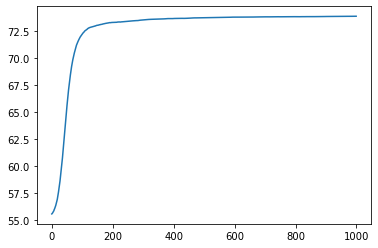

In [51]:
from implementations import logistic_regression
weights, loss = logistic_regression(y_new, tX_new, max_iters=1000)

In [52]:
corrs = []
for i in range(tX.shape[1]):
    corrs.append(np.corrcoef(tX[:, i], y)[0, 1])

In [53]:
sorted(corrs)

[-0.3514279558616751,
 -0.19539789618287817,
 -0.031947586805348205,
 -0.015287426687781413,
 -0.014055273784852506,
 -0.0044025386863883985,
 -0.0009432510582117487,
 0.0015162353770597236,
 0.0041254474115248515,
 0.0074753421885902374,
 0.012245481285482902,
 0.02246575151078583,
 0.13354912308169134,
 0.13429572666925302,
 0.1355202615226846,
 0.14055440046509557,
 0.1407143669504368,
 0.14125568650533774,
 0.1412649137760153,
 0.14134598859646297,
 0.1416459925656641,
 0.15046803779292678,
 0.15046926004977906,
 0.1532359324758135,
 0.15760414567634926,
 0.19176608807477077,
 0.19252632856874796,
 0.23523797587836723,
 0.23914905789154473,
 0.2717518770516493]